In [1]:
import gensim
import pandas as pd
from config import *
from tools import *
from gensim.models import Word2Vec
from gensim.models.callbacks import CallbackAny2Vec
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [2]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [3]:
TARGET = 'creative_id'

In [4]:
tr_clk_list_df = pd.read_pickle(TRAIN_DIR+CLK_PATH_DICT[TARGET])
ts_clk_list_df = pd.read_pickle(TEST_DIR+CLK_PATH_DICT[TARGET])

In [5]:
grid_df = pd.concat([tr_clk_list_df, ts_clk_list_df], axis=0)
del tr_clk_list_df, ts_clk_list_df

In [6]:
grid_df[TARGET] = grid_df[TARGET].map(lambda x: list(map(str, x)))

In [7]:
sentences = grid_df[TARGET].values.tolist()

In [8]:
class loss(object):
    def __init__(self):
        self.loss_list = []

In [13]:
### Gensim callback
#####################################
class callback(CallbackAny2Vec):
    '''Callback to print loss after each epoch.'''

    def __init__(self):
        self.epoch = 0
        self.loss = loss()

    def on_epoch_end(self, model):
        clear_output(wait=True)
        loss = model.get_latest_training_loss()
        
        self.loss.loss_list.append(loss)
        ### show loss
        if len(self.loss.loss_list) > 1:
            tmp = np.array(self.loss.loss_list)
            plt.plot(tmp[1:]-tmp[:-1])
            plt.show()
            
        print('loss list: ', self.loss.loss_list)
        print('Loss after epoch {}: {}'.format(self.epoch, loss))
        model.save('/home/baode/data1/huangzc/tencent/model_ckpt/gensim/model_%s.txt'%TARGET)
        self.epoch += 1

In [14]:
N_CORES = os.cpu_count()
print(N_CORES)

72


In [15]:
### Gensim Parameter
######################################
params = {'sentences': sentences,
          'size': 128,
          'window': 8,
          'min_count': 2,
          'compute_loss': True,
          'sample': 0.0001,
          'iter': 200,
          'workers': N_CORES,
          'callbacks': [callback()]}

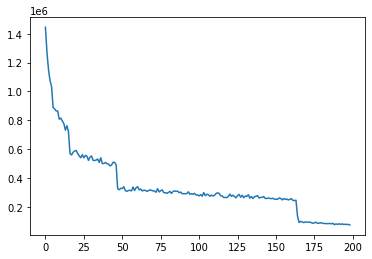

2020-06-20 04:33:18,550 : INFO : saving Word2Vec object under /home/baode/data1/huangzc/tencent/model_ckpt/gensim/model_creative_id.txt, separately None
2020-06-20 04:33:18,550 : INFO : storing np array 'vectors' to /home/baode/data1/huangzc/tencent/model_ckpt/gensim/model_creative_id.txt.wv.vectors.npy


loss list:  [2160111.5, 3604709.0, 4876562.0, 6027363.0, 7102294.5, 8134846.0, 9022428.0, 9901481.0, 10765807.0, 11629389.0, 12436707.0, 13251435.0, 14045672.0, 14822061.0, 15553498.0, 16315361.0, 17034422.0, 17603636.0, 18163104.0, 18741388.0, 19327852.0, 19918204.0, 20487164.0, 21040106.0, 21580172.0, 22141894.0, 22681578.0, 23237852.0, 23788896.0, 24310562.0, 24855094.0, 25407520.0, 25929218.0, 26450346.0, 26974230.0, 27505234.0, 28013104.0, 28553350.0, 29052648.0, 29553146.0, 30060388.0, 30559558.0, 31055994.0, 31539496.0, 32028860.0, 32537470.0, 33046054.0, 33537496.0, 33863264.0, 34181612.0, 34509704.0, 34836320.0, 35175632.0, 35487388.0, 35795212.0, 36108204.0, 36422748.0, 36733068.0, 37070308.0, 37382940.0, 37715716.0, 38054956.0, 38372164.0, 38695464.0, 39005420.0, 39320128.0, 39634164.0, 39941420.0, 40253024.0, 40570464.0, 40884756.0, 41195216.0, 41504172.0, 41805320.0, 42131184.0, 42434004.0, 42745680.0, 43063448.0, 43361408.0, 43659672.0, 43952900.0, 44252052.0, 44558984.0,

2020-06-20 04:33:19,385 : INFO : not storing attribute vectors_norm
2020-06-20 04:33:19,386 : INFO : storing np array 'syn1neg' to /home/baode/data1/huangzc/tencent/model_ckpt/gensim/model_creative_id.txt.trainables.syn1neg.npy
2020-06-20 04:33:21,583 : INFO : not storing attribute cum_table
2020-06-20 04:33:26,323 : INFO : saved /home/baode/data1/huangzc/tencent/model_ckpt/gensim/model_creative_id.txt
2020-06-20 04:33:26,325 : INFO : training on a 12733602800 raw words (11726914555 effective words) took 16185.1s, 724551 effective words/s


In [16]:
model = Word2Vec(**params)

In [17]:
# ### Restore Model
# # #####################################
save_path = '/home/baode/data1/huangzc/tencent/model_ckpt/gensim/model_%s.txt'%TARGET
model = Word2Vec.load(save_path)

2020-06-20 08:41:40,645 : INFO : loading Word2Vec object from /home/baode/data1/huangzc/tencent/model_ckpt/gensim/model_creative_id.txt
2020-06-20 08:41:49,521 : INFO : loading wv recursively from /home/baode/data1/huangzc/tencent/model_ckpt/gensim/model_creative_id.txt.wv.* with mmap=None
2020-06-20 08:41:49,522 : INFO : loading vectors from /home/baode/data1/huangzc/tencent/model_ckpt/gensim/model_creative_id.txt.wv.vectors.npy with mmap=None
2020-06-20 08:41:49,945 : INFO : setting ignored attribute vectors_norm to None
2020-06-20 08:41:49,946 : INFO : loading vocabulary recursively from /home/baode/data1/huangzc/tencent/model_ckpt/gensim/model_creative_id.txt.vocabulary.* with mmap=None
2020-06-20 08:41:49,946 : INFO : loading trainables recursively from /home/baode/data1/huangzc/tencent/model_ckpt/gensim/model_creative_id.txt.trainables.* with mmap=None
2020-06-20 08:41:49,947 : INFO : loading syn1neg from /home/baode/data1/huangzc/tencent/model_ckpt/gensim/model_creative_id.txt.t

### 新方法

In [18]:
vocab = model.wv.index2word

In [19]:
vocab_dict = dict(zip(vocab, list(range(len(vocab)))))

In [20]:
f = open(TRAIN_DIR+'gensim_%s_dict.js'%TARGET,'w')
f.write(str(vocab_dict))
f.close()

In [21]:
wv_matrix = model.wv.vectors

In [22]:
np.save(TRAIN_DIR+'gensim_%s.npy'%TARGET, wv_matrix)

In [23]:
wv_matrix.shape

(2086585, 128)